In [2]:
import pandas as pd
import numpy as np

# Загружаем датасет
df = pd.read_csv("heart.csv", header=None)

# Присваиваем русские названия столбцов
df.columns = [
    'возраст', 'пол', 'тип_боли_в_груди', 'артериальное_давление_покоя',
    'холестерин', 'уровень_сахара_натощак', 'результат_ЭКГ_покоя',
    'макс_частота_сердечных_сокращений', 'стенокардия_нагрузки', 'депрессия_ST',
    'наклон_ST', 'количество_сосудов', 'талассемия', 'целевая_переменная'
]

# Удаляем целевую переменную
df = df.drop('целевая_переменная', axis=1)

print("Данные успешно загружены. Количество строк:", df.shape[0])


Данные успешно загружены. Количество строк: 1026


In [6]:
# Определение размерности, типов признаков и наличия пропусков
print("=" * 60)
print("АНАЛИЗ ДАННЫХ")
print("=" * 60)

# 1. Размерность данных
print("1. РАЗМЕРНОСТЬ ДАННЫХ:")
print(f"   Количество строк: {df.shape[0]}")
print(f"   Количество столбцов: {df.shape[1]}")
print()

# 2. Типы признаков
print("2. ТИПЫ ПРИЗНАКОВ:")
print(df.dtypes)
print()

# 3. Наличие пропущенных значений
print("3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing_values = df.isnull().sum()
print(missing_values)
print()

# 4. Детальная информация о датасете
print("4. ДЕТАЛЬНАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print(df.info())
print()

# 5. Дополнительная статистика по пропускам
print("5. СТАТИСТИКА ПО ПРОПУСКАМ:")
total_cells = df.shape[0] * df.shape[1]  # Замена np.product на прямое умножение
total_missing = missing_values.sum()
print(f"   Всего ячеек в датасете: {total_cells}")
print(f"   Всего пропущенных значений: {total_missing}")
print(f"   Процент пропущенных значений: {round((total_missing/total_cells)*100, 2)}%")

АНАЛИЗ ДАННЫХ
1. РАЗМЕРНОСТЬ ДАННЫХ:
   Количество строк: 1026
   Количество столбцов: 13

2. ТИПЫ ПРИЗНАКОВ:
возраст                              object
пол                                  object
тип_боли_в_груди                     object
артериальное_давление_покоя          object
холестерин                           object
уровень_сахара_натощак               object
результат_ЭКГ_покоя                  object
макс_частота_сердечных_сокращений    object
стенокардия_нагрузки                 object
депрессия_ST                         object
наклон_ST                            object
количество_сосудов                   object
талассемия                           object
dtype: object

3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
возраст                              0
пол                                  0
тип_боли_в_груди                     0
артериальное_давление_покоя          0
холестерин                           0
уровень_сахара_натощак               0
результат_ЭКГ_покоя                  0
макс_

В результате дескриптивного анализа данных мы получаем  информацию о структуре и характеристиках датасета. Размерность (количество строк и столбцов) позволяет понять, насколько велик набор данных и какие признаки (столбцы) в нем присутствуют. Типы данных помогают определить, какие из признаков являются категориальными, а какие — числовыми, что важно для выбора методов анализа и обработки данных. Проверка на пропуски помогает выявить, есть ли в данных недостающие значения, и на основе этого решить, как с ними работать (например, удалить или заполнить). Основные статистики, такие как среднее, медиана, стандартное отклонение и минимальные/максимальные значения, дают представление о распределении числовых данных, их диапазоне и возможных аномалиях. Наконец, проверка уникальных значений в столбцах помогает выявить категориальные переменные и понять, сколько различных классов или категорий представлено в каждом признаке. Этот анализ является важным этапом перед любыми дальнейшими шагами, такими как подготовка данных для машинного обучения или кластеризации.
 

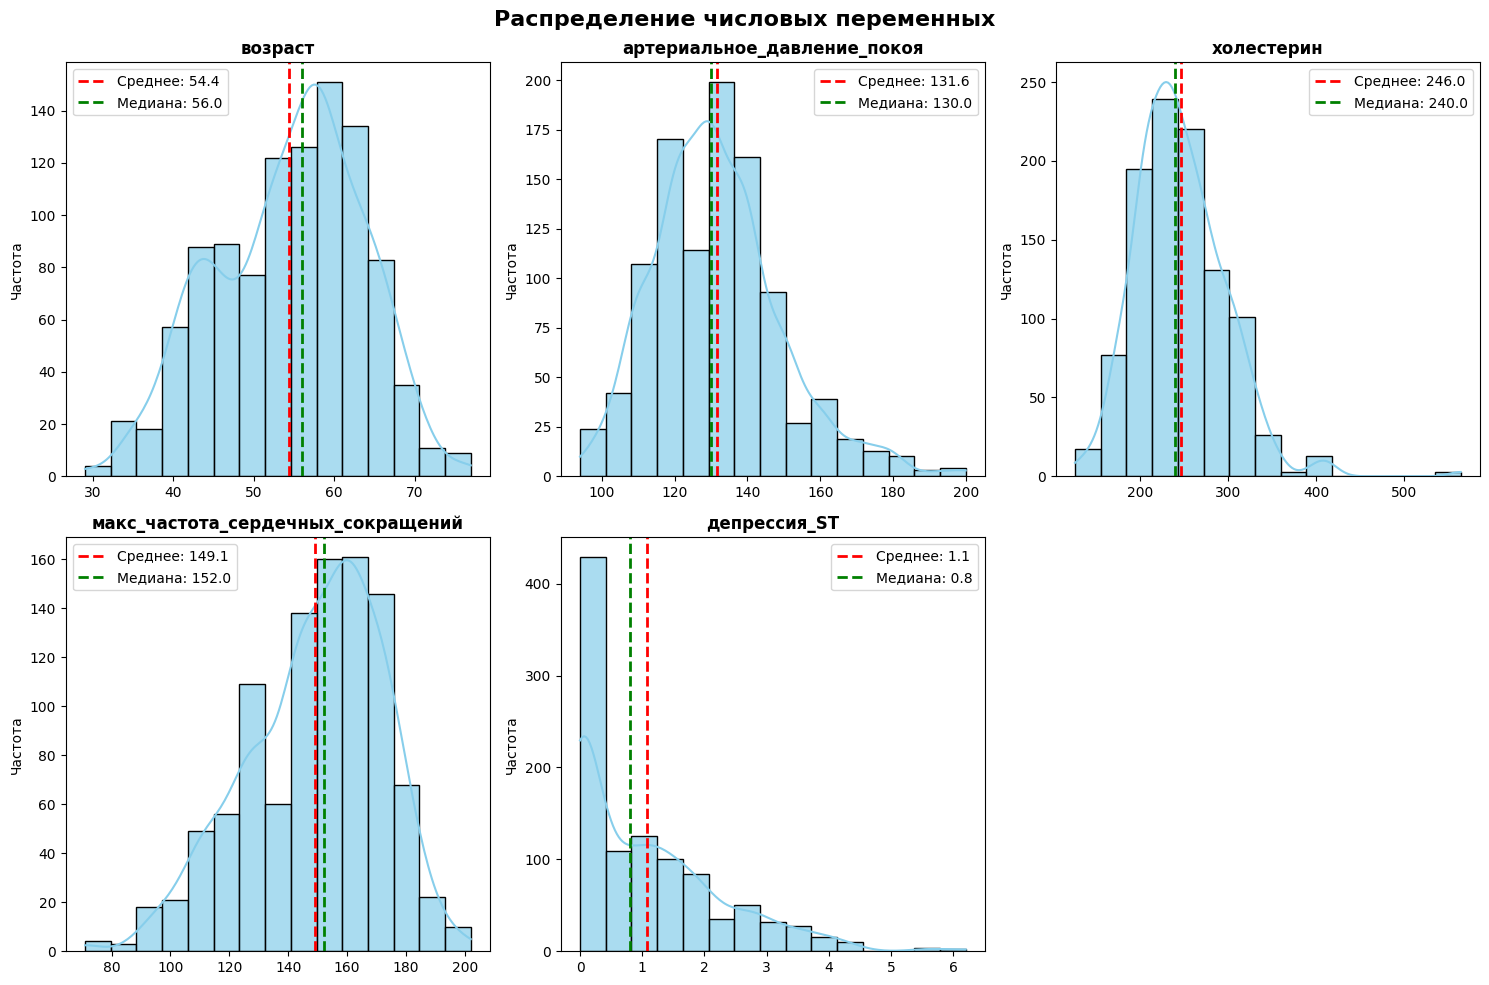

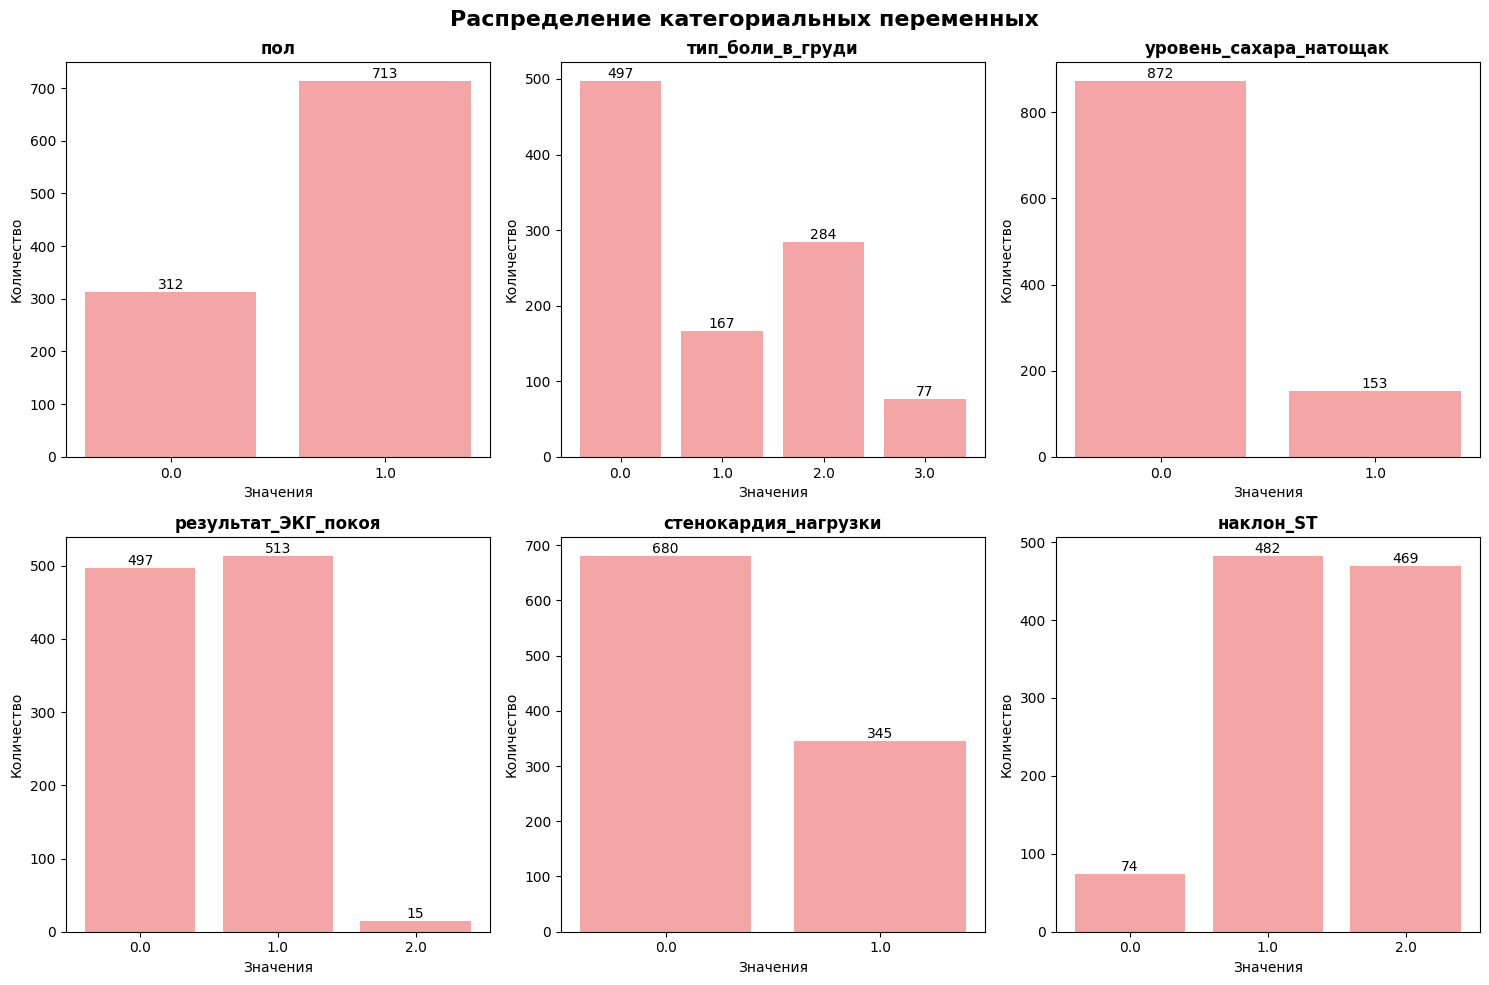

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Преобразуем данные в числовой формат
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

# ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ
numeric_columns = ['возраст', 'артериальное_давление_покоя', 'холестерин', 
                   'макс_частота_сердечных_сокращений', 'депрессия_ST']
available_columns = [col for col in numeric_columns if col in df_numeric.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение числовых переменных', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(available_columns):
    if i < len(axes):
        sns.histplot(df_numeric[col], kde=True, ax=axes[i], bins=15, color='skyblue', alpha=0.7)
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Частота')
        
        mean_val = df_numeric[col].mean()
        median_val = df_numeric[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.1f}')
        axes[i].legend()

for i in range(len(available_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ
categorical_columns = ['пол', 'тип_боли_в_груди', 'уровень_сахара_натощак', 
                       'результат_ЭКГ_покоя', 'стенокардия_нагрузки', 'наклон_ST']
available_categorical = [col for col in categorical_columns if col in df_numeric.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Распределение категориальных переменных', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(available_categorical):
    if i < len(axes):
        value_counts = df_numeric[col].value_counts().sort_index()
        axes[i].bar([str(x) for x in value_counts.index], value_counts.values, color='lightcoral', alpha=0.7)
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Количество')
        
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + 0.1, str(v), ha='center', va='bottom')

for i in range(len(available_categorical), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

На представленных гистограммах с графиками плотности видно распределение различных числовых признаков датасета. Для большинства признаков можно наблюдать выраженные отклонения от нормального распределения. Например, для некоторых признаков распределение имеет явную асимметрию или несколько пиков, что указывает на то, что данные могут следовать распределениям, отличным от нормального. В других случаях графики имеют более ровную форму, напоминающую нормальное распределение, но не всегда достаточно симметричную или "колоколообразную". Также есть признаки, которые показывают явную концентрацию значений в определённых диапазонах, что может указывать на дискретность данных или наличие выбросов. Этот анализ позволяет понять, какие признаки могут требовать дополнительной обработки, например, трансформации данных (например, логарифмирования), чтобы привести их ближе к нормальному распределению перед использованием в моделях машинного обучения.


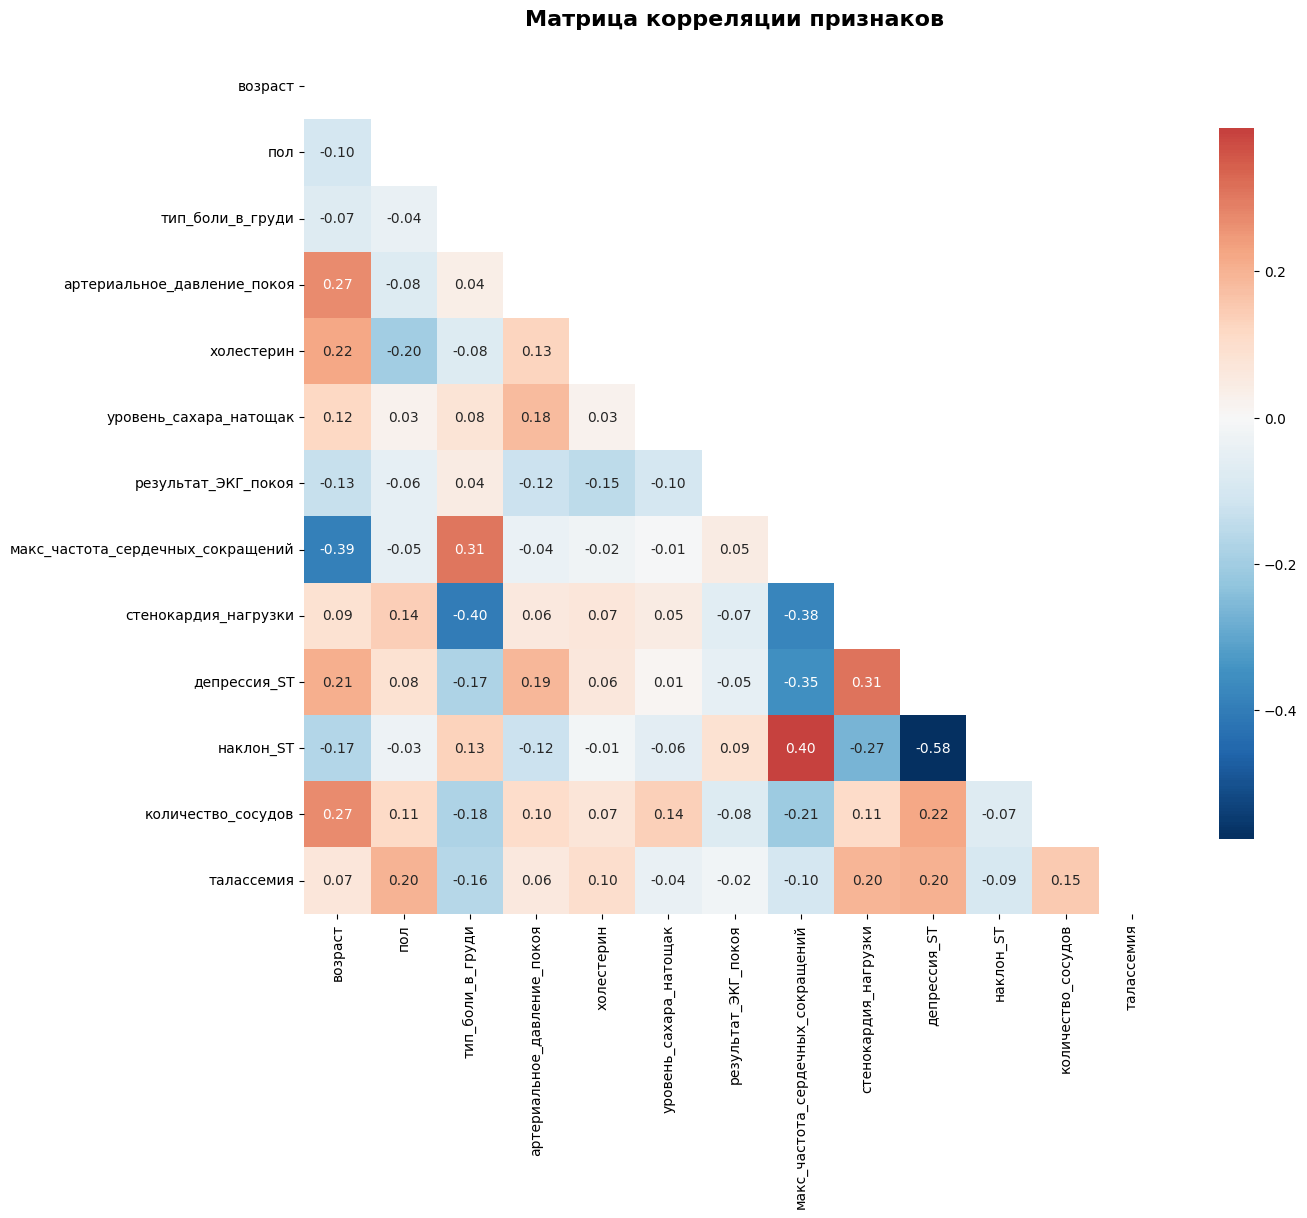

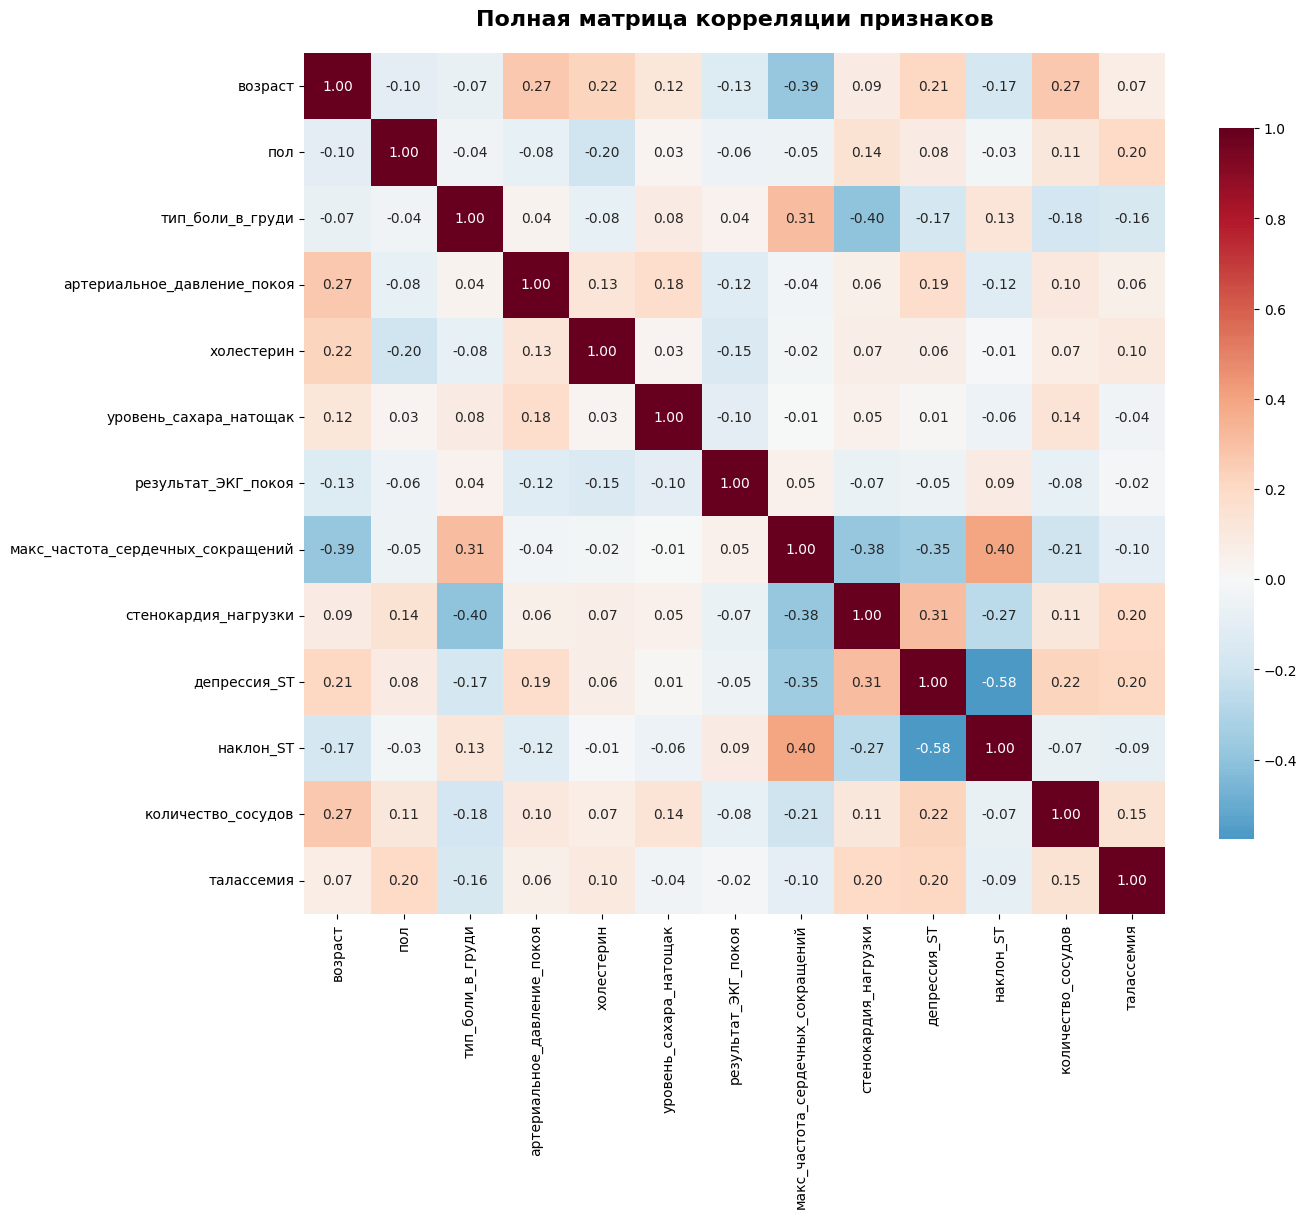

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Преобразуем данные в числовой формат
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Вычисляем матрицу корреляции
correlation_matrix = df_numeric.corr()

# Создаем тепловую карту корреляции
plt.figure(figsize=(14, 12))

# Маска для скрытия верхней треугольной части матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Тепловая карта
heatmap = sns.heatmap(correlation_matrix, 
                      mask=mask,
                      annot=True, 
                      fmt='.2f', 
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      cbar_kws={'shrink': 0.8})

plt.title('Матрица корреляции признаков', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Дополнительная тепловая карта без маски для полного обзора
plt.figure(figsize=(14, 12))
heatmap_full = sns.heatmap(correlation_matrix, 
                          annot=True, 
                          fmt='.2f', 
                          cmap='RdBu_r',
                          center=0,
                          square=True,
                          cbar_kws={'shrink': 0.8})

plt.title('Полная матрица корреляции признаков', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Анализ наиболее коррелирующих признаков с целевой переменной
if 'целевая_переменная' in df_numeric.columns:
    target_correlations = correlation_matrix['целевая_переменная'].sort_values(ascending=False)
    
    # График корреляций с целевой переменной
    plt.figure(figsize=(10, 8))
    target_correlations.drop('целевая_переменная').plot(kind='barh', color='steelblue')
    plt.title('Корреляция признаков с целевой переменной', fontsize=16, fontweight='bold')
    plt.xlabel('Коэффициент корреляции')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()